# Convolutional Neural Network

## Steps

1. Import the libraries
2. Load the data
3. Pre-processing
4. Model

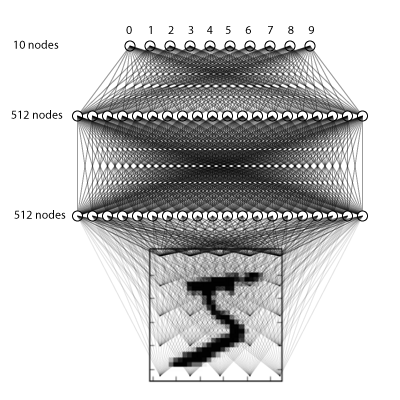

In [43]:
from PIL import Image
Image.open('Images/23-neural-net.png')

## Introduction

Fully connected neural networks typically don't work well on images as it does not scale well. This is because if each pixel is an input, then as we add more layers the amount of parameters increases exponentially. 

Let's say you had a 32x32 image. That's 32 wide, 32 high, and with three color channels. A single, fully connected neuron in the first hidden layer of a regular neural network would have 32 x 32 x 3, and that's 3,072 weights. 

A color image, which isn't significantly larger, so something that is 200 wide by 200 high, with three color channels, so a fully connected neuron in the first hidden layer of a regular neural network would have 200 x 200 x 3, which is 120,000 weights. 

The other challenge is that the number of parameters this large can quickly lead to over-fitting. One work around is that we can use smaller images, but clearly we will lose information. What we have not taken into account is that what makes one image distinguishable from another is its __spacial structure__. Areas close to each other are highly significant for something like an image. 

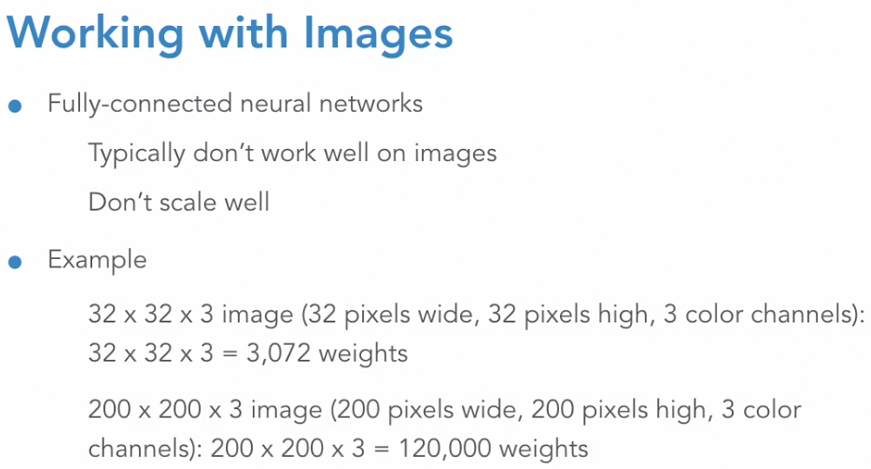

In [1]:
Image.open('Images/14-intro-cnn.png')

## Zero Padding & Pooling

During the forward pass, we slide, or convolve, each filter across the width and height of the input volume, and compute dot products between the entries of the filter and the input at any position.

So, for example, we'll take the four from the top corner of our three by three filter, and multiply that by zero in the image. And then move your cross, we will multiply the zero on the filter with the corresponding location on the image which is also a zero, and so on. And we will do that for all of the nine entries in the kernel. 

We then sum up all of the product or multiplication calculations, and this known as the __dot product__. 

### Sliding the filter
As we slide the filter over the width and height of the input volume, we will produce a __two dimensional activation map __that gives the responses of that filter at every __spacial position__.


Here's an example of what convolving looks like for a seven-by-seven image with a three-by-three filter. (Imagine moving your 3x3 box one step to the right every time and down one step afer reaching the end (right side) and repeat until we reach the end.

We have used a three-by-three filter, and this filter moves across the image by one each time. 

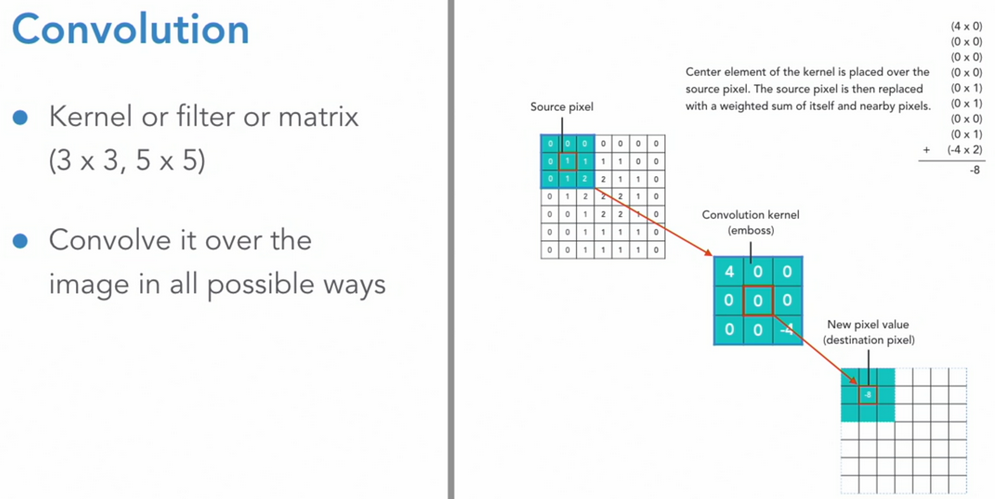

In [2]:
Image.open('Images/15-convolution.png')

### Convolving Operation

This convolving operation is basically moving this filter across our entire image in this way, from left to right, and from top to bottom. 

### Challenge 

One of the big challenges with convolving is that we lose data from our original image below. 

We can see that with a five-by-five filter our image size has gone from a 32 x 32, and after a convolution layer we've reduced to a 28 x 28. And a further convolution layer results in a 24 x 24 image. 

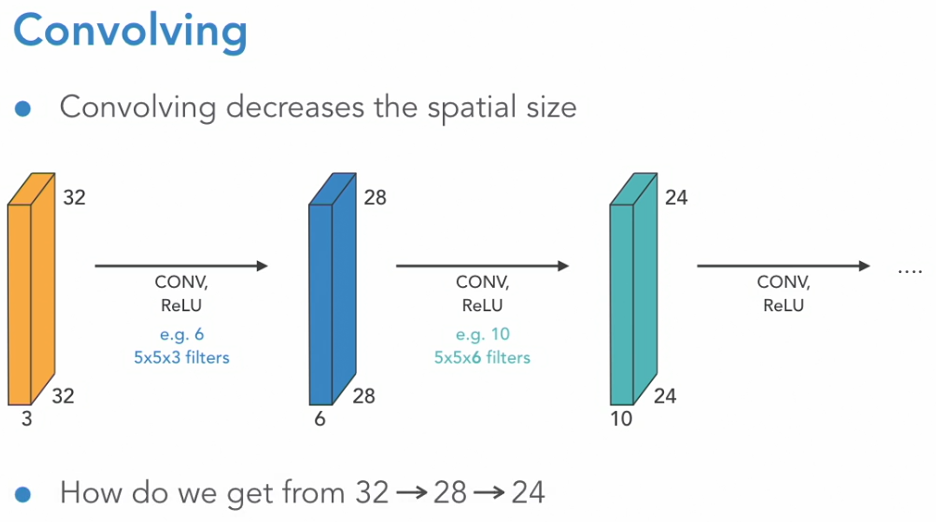

In [3]:
Image.open('Images/16-convolving.png')

## Zero Padding that preserves the spacial size (Answer to what we can use this for)
If we want to preserve the spacial size of the input volume, so the input and output width and height are the same, then __zero padding__ is a helpful technique. 

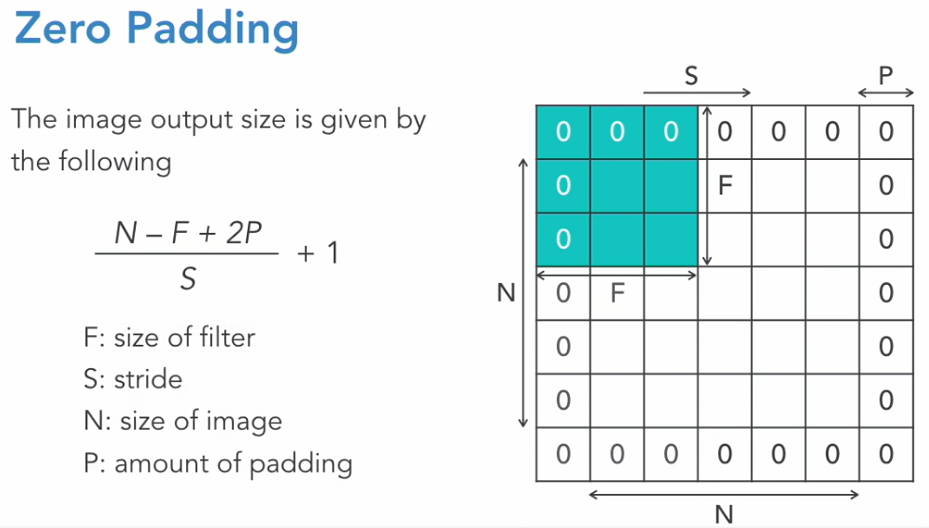

In [4]:
Image.open('Images/17-zero-padding.png')

### Defining the CNN
So if we define F as the size of our filter, S as the stride, N as the size of the image, and P as the amount of padding that we require, then the image output size is given by the following. N minus F plus 2P divided by S, and add one to that. The size of the zero padding is a hyper parameter. This allows us to control the spacial size of the output image. 

## Max Pooling

With max pooling we normally work with a two-by-two block with the stride size of two. This means that we want to take an input which is of size four-by-four, and we want to reduce it to two-by-two. 

What we're doing is we're taking the maximum value from each block and capturing it. 

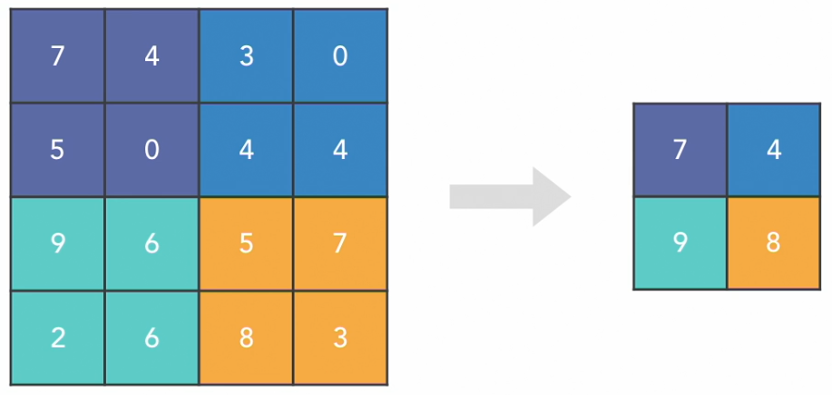

In [5]:
Image.open('Images/18-max-pooling.png')

### Why pooling

- The function of pooling is to progressively reduce the spacial size of the representation to reduce the amount of parameters and computation in the network. 


- As you could imagine, a huge benefit of this is this will reduce the chance of your model over-fitting. 


- Max pooling tends to be more popular as convolutions light up when they detect a particular feature in a region of an image.


- It also makes sense to keep the parts that were most activated when downsampling (nonlinear), and so max pooling preserves this while as average pooling doesn't. 

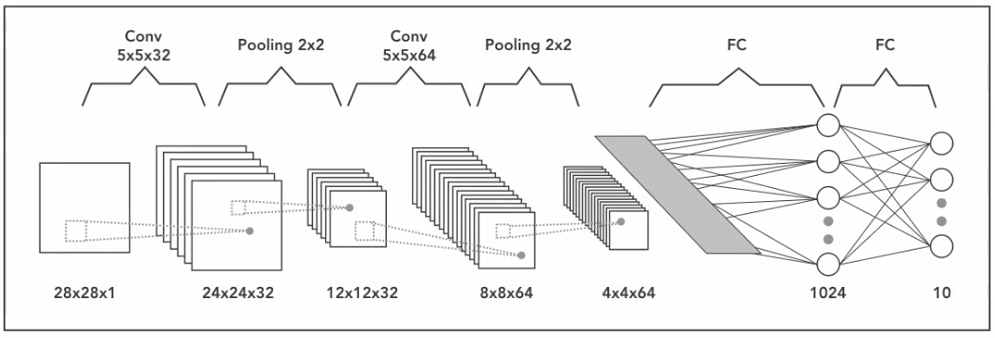

In [6]:
Image.open('Images/19-cnn.png')

### Read the Example Above

The input is a 28 x 28 grayscale image. Because this is a grayscale image, the number of channels will be one. So that's why we have 28 x 28 x 1. If this was a color image, the number of channels would be 3, so the 3 corresponds to RGB, or red, green, and blue. 

The input data goes through two convolution layers that have a kernel size of 5. The first convolution has 32 output feature maps, and the second one has 64 output feature maps. 

Each convolution layer is followed by a sub-sampling using pooling, and we can see that after each pooling activity the dimensions reduce by half. So it goes from 24 x 24 to a 12 x 12. And from an 8 x 8 to a 4 x 4. 

A fully connected layer passes the output to a second fully connected layer which acts as the final soft max output layer. As there are ten outputs in the final layer, this will indicate which of the ten digits was recognized. 

## Dropout

The purpose of Dropout is to __prevent overfitting__. The effect of this random Dropout forces the network to learn a redundant representation of the data. 

So Dropout is randomly killing each neuron in a layer of a training set with probability p. This Dropout probability is determined by you. The common choice is p = 0.5 So this means that half of the neurons in a layer are dropped during training.

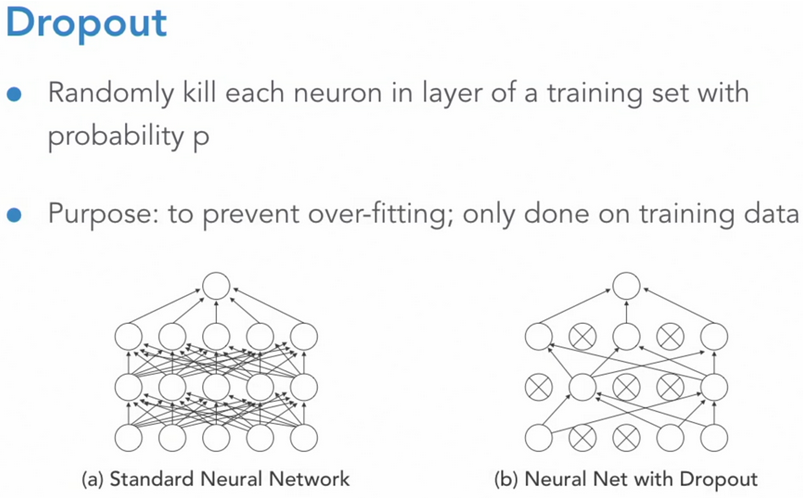

In [40]:
Image.open('Images/21-dropout.png')

### Model must learn from patterns instead of remembering
Therefore the network cannot rely on an activation of any set of hidden units, since they may be turned off at any time during training. And the model is forced to learn more general and more robust patterns from the data. 

Remember that Dropout only takes place during training the data, and we don't use it when evaluating data. 

## Image Augmentation

Image augmentation is the process of taking images that are already in a training dataset, and manipulating them to create many altered versions of the same image. 

This not only provides more images to train on, but it can also help expose our model to a wider variety of image manipulations, such as reflection and thus making the model more robust. 

Keras allows for image augmentation. This is where we generate batches of image data with real time data augmentation. The data will be looped over in batches indefinitely. 

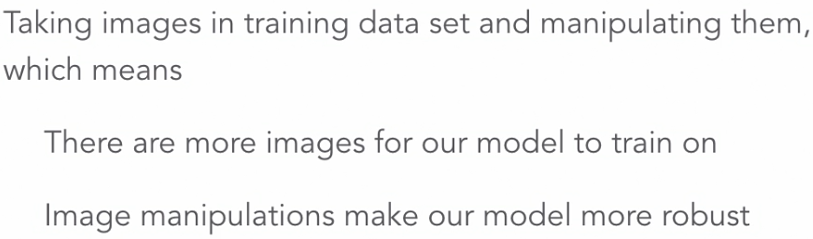

In [41]:
Image.open('Images/22-image-aug.png')

### Image Aug Steps
- Check images/sample-train
- Check images/sample-confirm is empty


In [44]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications.inception_v3 import preprocess_input

## Check that sample-confirm folder is empty (Review Keras functions from other resources)

### Using sample training data
We're going to be using the image data generator from Keras. We've already confirmed that the sample.confirm folder is empty. And using these two image generators, we are then going to create our versions of the training data set. 

### Process
So we're going to shift the width by 0.2. We're going to shift the height by 0.2. In some instances, we are also going to flip the images horizontally. And similarly, in the test set, we're going to perform manipulations to the width, height, the shear range, the zoom, so we're going to zoom in by 0.2, and we're going to flip the images in that way, more advanced topic in Keras. 

 All we're doing is altering the images in some way and that's creating more data in our data set. 

In [45]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

jf_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True
)

### Confirm train_datagen function

In [46]:
train_generator = train_datagen.flow_from_directory('Course_Images/sample-train/',
                                                    target_size=(150,150),
                                                    save_to_dir='Course_Images/sample-confirm/')

Found 6 images belonging to 2 classes.


### Generate variations of images

In [47]:
i=0
for batch in train_datagen.flow_from_directory('Course_Images/sample-train/', target_size=(150, 150), save_to_dir='Course_Images/sample-confirm/'):
    i+=1
    if (i>10):
        break

Found 6 images belonging to 2 classes.


### Generate variations of those images

In [49]:
j=0
for batch in jf_datagen.flow_from_directory('Course_Images/sample-train/', target_size=(150, 150), save_to_dir='Course_Images/sample-confirm/'):
    j+=1
    if ( j > 10):
        break

Found 6 images belonging to 2 classes.


-------

## Modeling CNN

### Import the libraries

In [7]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### Load the data

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # numpy arrays

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Pre-processing

In [10]:
# Set batch, classes, epochs
batch_size = 128
num_classes = 10

# MNIST images only have a depth of 1, but we must explicitly declare that
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

# Change feature time
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize; we use 255 because our image is grayscale which has a max value of 255
X_train /= 255.0
X_test /= 255.0

# Change Y values to categories
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


### Use the model

We have our original image which is 28 x 28 with 1 channel so it's a grayscale image. 

We then do the convolution operation with the 5 x 5 kernel and then there are 32 filters. 

We then do a pooling so our image drops from 24 x 24 to 12 x 12. 

We then do another convolution operation with the 5 x 5 kernel and this time with 64 filters. 

We do another pooling. Again, we see a reduction in our image by half. That's from 8 x 8 to 4 x 4. 

Finally, there's a flattening so there's a fully connected network. Then we've got the output. We've got all of the 1,024 notes terminating in the 10 outputs. The 10 outputs correspond to the ten digits, zero to nine.

In [12]:
# Instantiate model
cnn = Sequential()

# Add convolutional layer  with 32 outputs with pooling
# 32 filters, kernel size, input_shape is grayscale image dimensions
cnn.add(Conv2D(32, kernel_size=(5, 5),input_shape=(28, 28, 1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())

# Add convolutional layer  with 32 outputs with pooling
# 64 filters, kernel size, input_shape is grayscale image dimensions
cnn.add(Conv2D(64, kernel_size=(5, 5),padding='same', activation='relu'))
cnn.add(MaxPooling2D())

# Flatten the data to input into dense layer of 1
# Flatten the network is because we've got a dense network or a fully connected network coming next
cnn.add(Flatten())

# Add dense layer with a relu activation function
cnn.add(Dense(64, activation='relu'))

# Add dense layer with a softmax activation function for classification
cnn.add(Dense(10, activation='softmax'))

# Compile the model and add loss, optimizer, metrics
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
print(cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                200768    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total para

### Why do we have 0 parameters for max pooling and flatten?

We have zero parameters for max pooling and for flatten. This is because it computes a fixed function of the input.

In [32]:
# Fit the model
cnn_model = cnn.fit(X_train,
                    y_train,
                    epochs=20,
                    verbose=1, # show training
                    validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0044 - acc: 0.9986 - val_loss: 0.0534 - val_acc: 0.9915
Epoch 2/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.0038 - acc: 0.9989 - val_loss: 0.0756 - val_acc: 0.9889
Epoch 3/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0058 - acc: 0.9983 - val_loss: 0.0542 - val_acc: 0.9919
Epoch 4/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0054 - acc: 0.9986 - val_loss: 0.0435 - val_acc: 0.9929
Epoch 5/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0038 - acc: 0.9990 - val_loss: 0.0404 - val_acc: 0.9926
Epoch 6/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0050 - acc: 0.9987 - val_loss: 0.0473 - val_acc: 0.9916
Epoch 7/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0037 - acc: 0.9992 - val_loss: 0.0624 - 

### Evaluate and save

In [33]:
# Evaluate
error_rate = cnn.evaluate(X_test, # features
                          y_test) # expected output

# Save the model
cnn.save('cnn_model.h5')

10000/10000 [==============================] - 0s 41us/step


### Accuracy

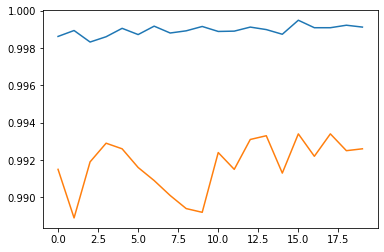

In [34]:
# Plot
plt.plot(cnn_model.history['acc'])
plt.plot(cnn_model.history['val_acc'])

### Dense model

In [35]:
import keras

# Load dense model
model = keras.models.load_model('dense_model.h5')

### Comparing to CNN

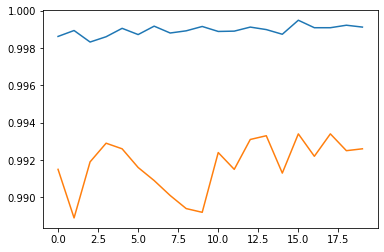

In [36]:
# Plot CNN model
plt.plot(cnn_model.history['acc'])     # blue
plt.plot(cnn_model.history['val_acc']) # orange

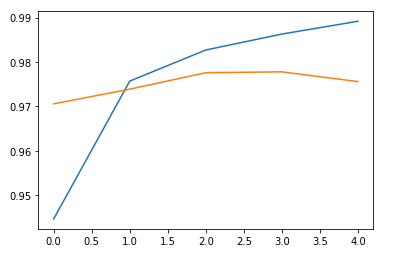

In [37]:
Image.open('Images/20-dense.png')